In [8]:
import torch

from model import RetinaNet

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print("Using", device)

Using cuda


In [9]:
model = RetinaNet()
model = model.to(device)

In [12]:
imgs = torch.rand(1, 3, 768, 1024, device=device)
cls_out, reg_out = model(imgs)

print(cls_out[2].shape, reg_out[2].shape)

torch.Size([1, 720, 24, 32]) torch.Size([1, 36, 24, 32])


Anchor boxes area check:
P3 Correct Area: True
P4 Correct Area: True
P5 Correct Area: True
P6 Correct Area: True
P7 Correct Area: True

P3 center coordinates:


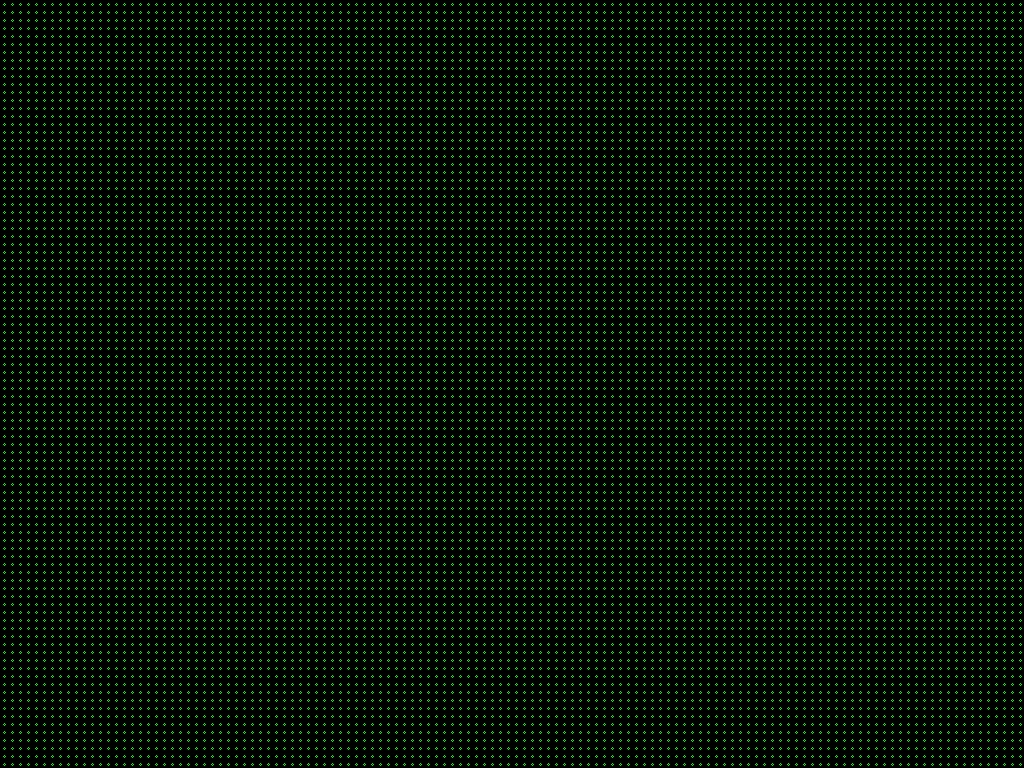

P3 anchor boxes:


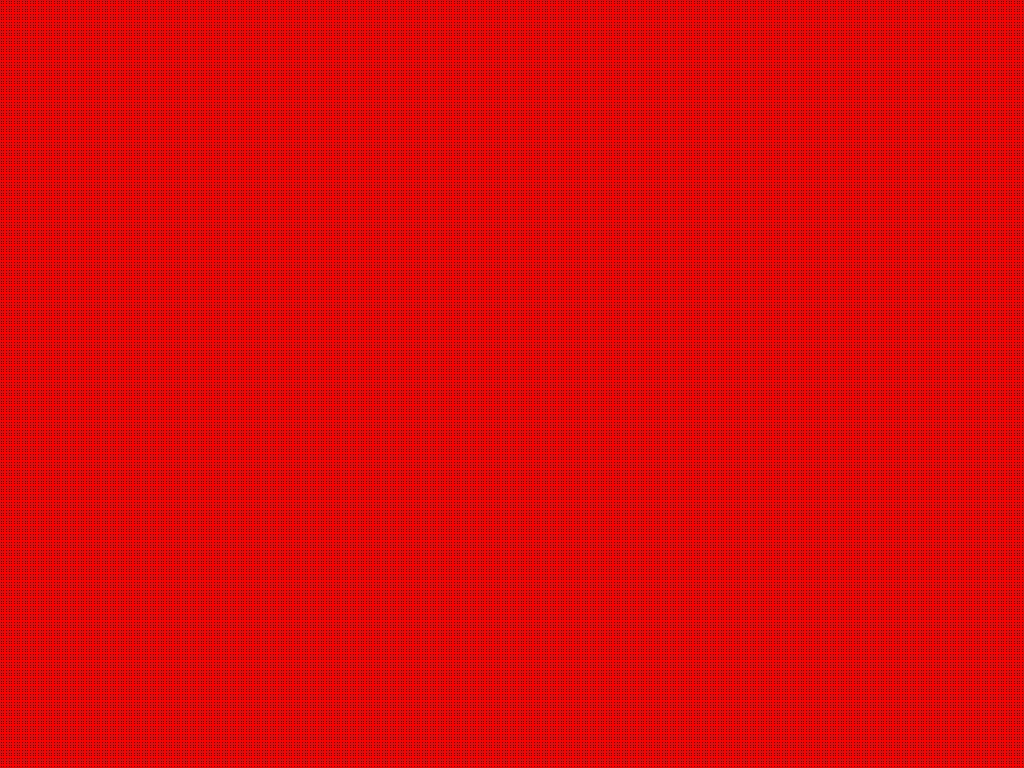

P4 center coordinates:


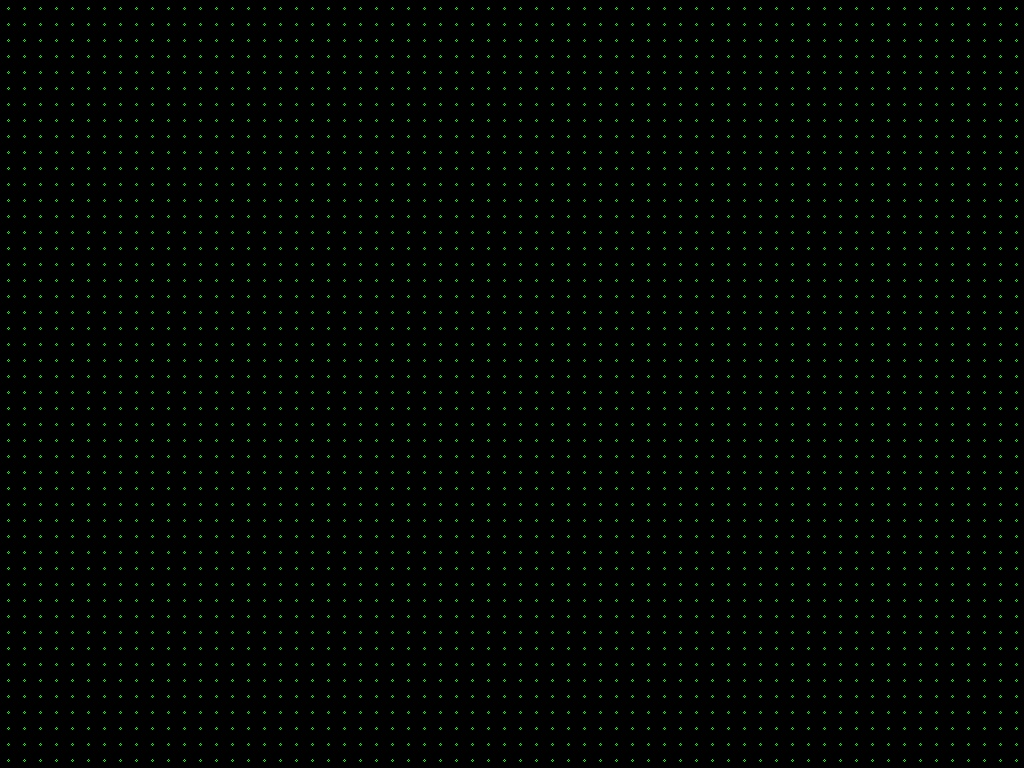

P4 anchor boxes:


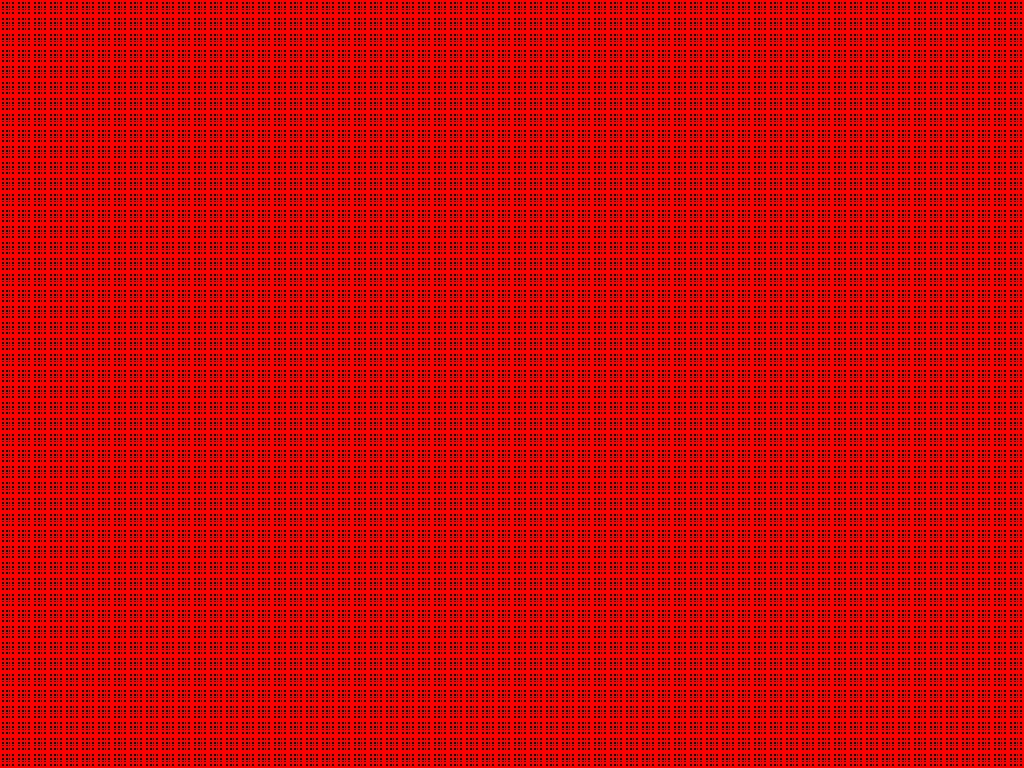

P5 center coordinates:


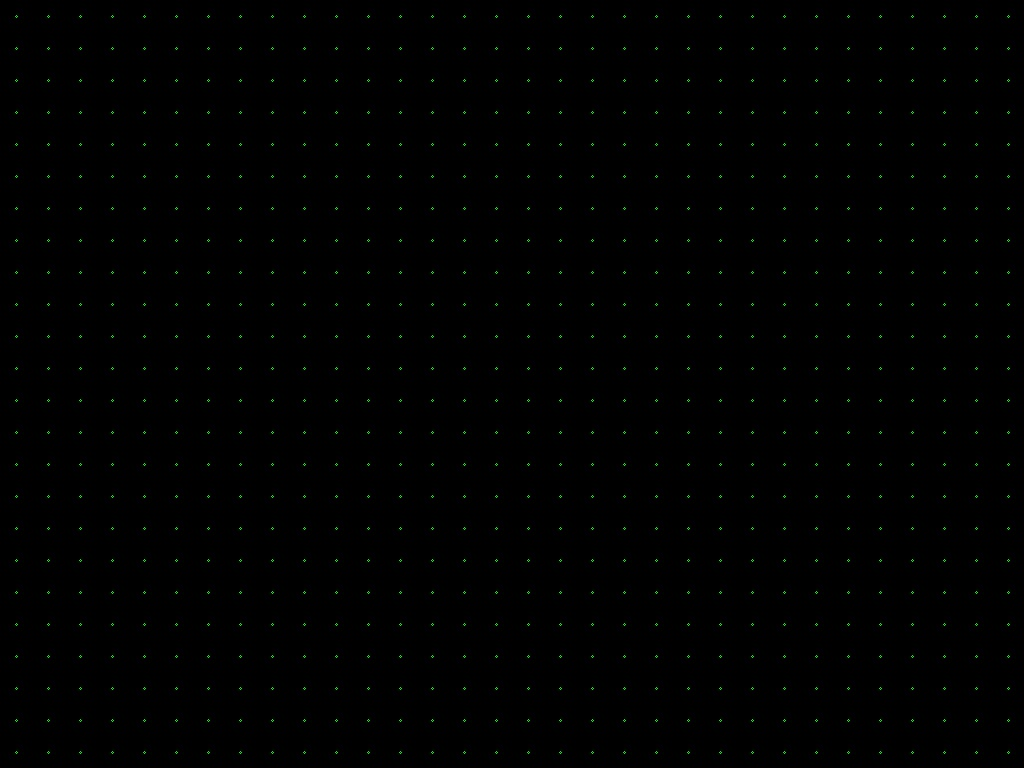

P5 anchor boxes:


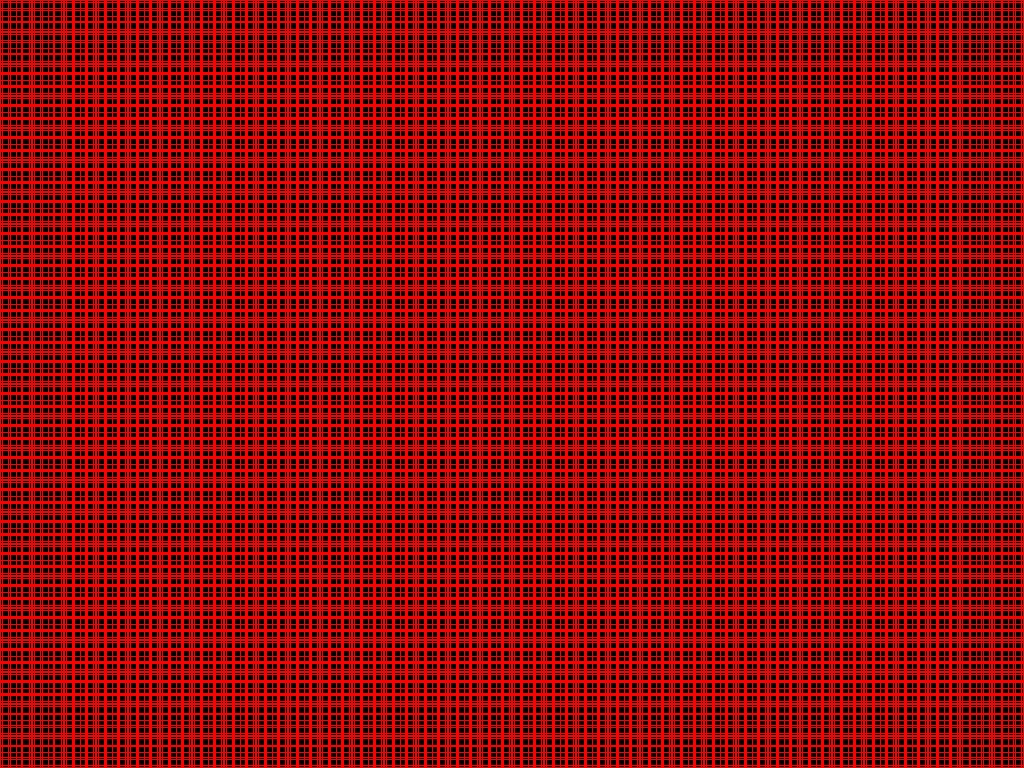

P6 center coordinates:


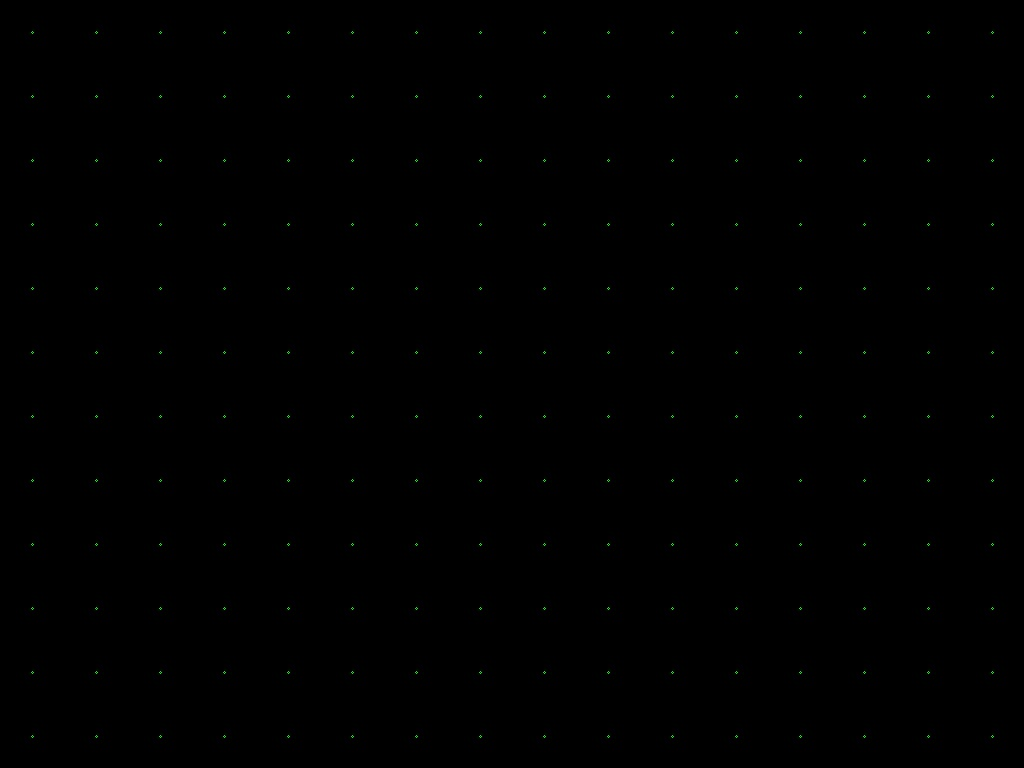

P6 anchor boxes:


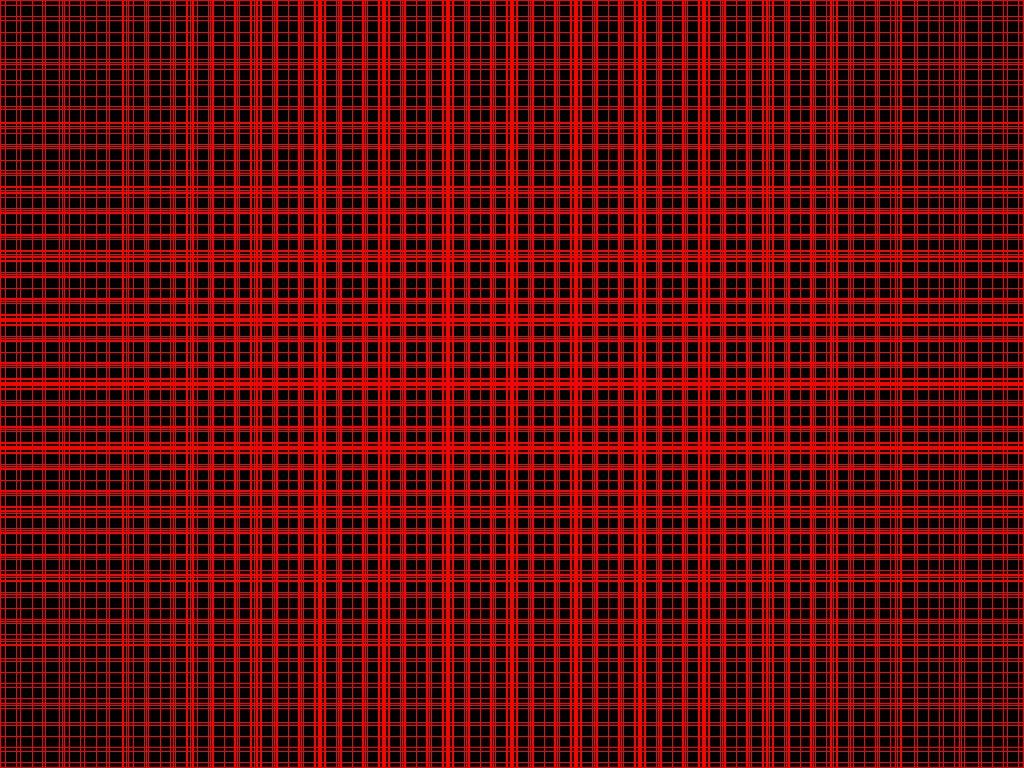

P7 center coordinates:


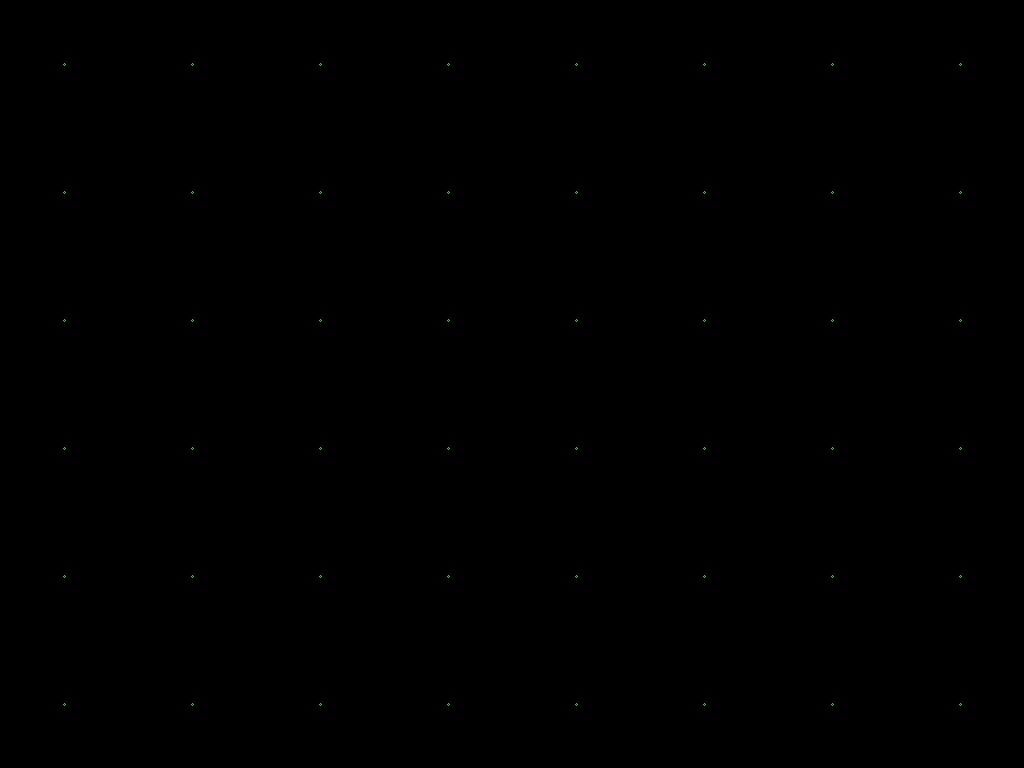

P7 anchor boxes:


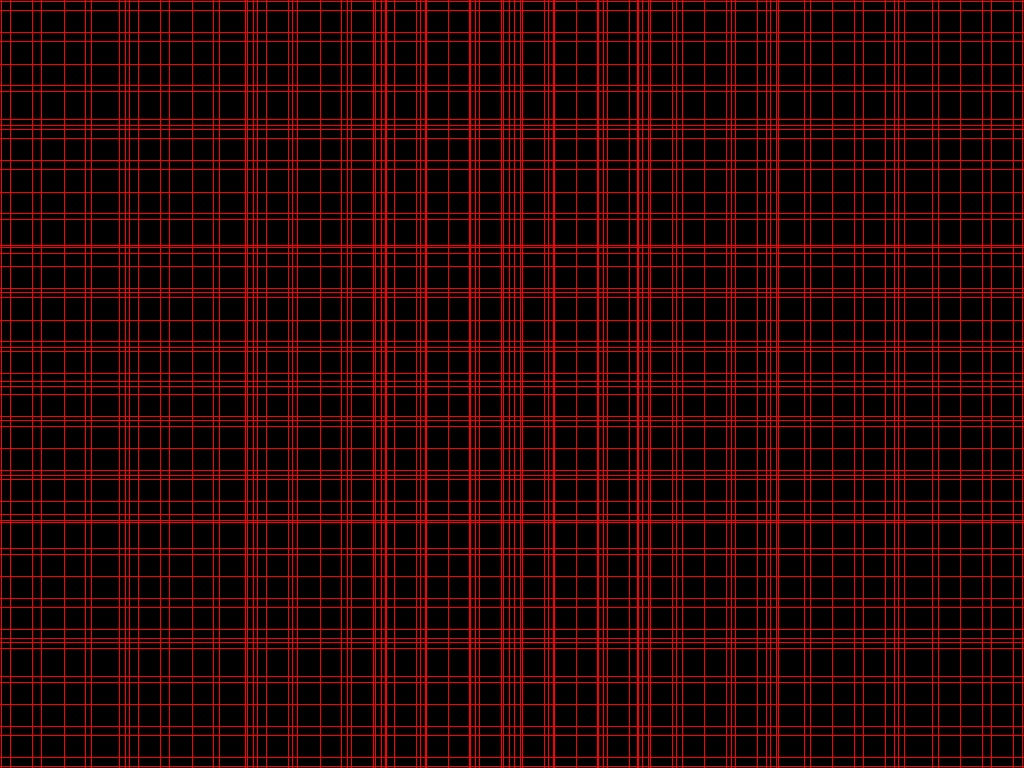

In [16]:
# Test anchor box stuff

import torch
import numpy as np
import cv2
import IPython

from anchors import build_anchor_boxes, get_box_centers

img_h, img_w = 768, 1024

anchor_boxes = build_anchor_boxes()
anchor_ctrs  = get_box_centers(img_h, img_w)

print('Anchor boxes area check:')
for i, t in enumerate(anchor_boxes):
    base = 2 ** (i + 5)
    expected_areas = (base * torch.tensor([2 ** 0, 2 ** (1.0 / 3.0), 2 ** (2.0 / 3.0)])) ** 2
    expected_areas = expected_areas.repeat(3)

    areas = t[0, :] * t[1, :]

    print('P{}'.format(i + 3), 'Correct Area:', torch.allclose(areas, expected_areas))

print('')

# Display anchor boxes
def imshow(img):    
    _ , ret = cv2.imencode('.jpg', img) 
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)

for i, coords in enumerate(anchor_ctrs):
    centers_img = np.zeros((img_h, img_w, 3), dtype=np.uint8)
    boxes_img   = np.zeros((img_h, img_w, 3), dtype=np.uint8)

    x_ctr_coords, y_ctr_coords = coords
    lvl_anc_boxes = anchor_boxes[i]

    for x in x_ctr_coords:
        for y in y_ctr_coords:
            for box_idx in range(lvl_anc_boxes.shape[1]):
                h, w  = lvl_anc_boxes[:, box_idx]
                start = (int(x - w / 2), int(y - h / 2))
                end   = (int(x + w / 2), int(y + h / 2))
                cv2.rectangle(boxes_img, start, end, (0, 0, 255), 1)

            cv2.circle(centers_img, (x, y), 1, (0, 255, 0))

    print('P{} center coordinates:'.format(i + 3))
    imshow(centers_img)

    print('P{} anchor boxes:'.format(i + 3))
    imshow(boxes_img)